In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student-mat.csv')

In [3]:
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
import missingno as msno

# msno.matrix(data, figsize=(15,3))

sum(data.isnull().any())


0

In [9]:
data['school'].value_counts()
# sns.histplot(data['Fjob'])
# sns.distplot(data['age'])


GP    349
MS     46
Name: school, dtype: int64

In [10]:
binary_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
                    'romantic']
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                    'absences']
categorical_features = ['Mjob', 'Fjob', 'reason', 'guardian']

In [11]:
y = data['G3']
X = data.drop(columns=['G1', 'G2', 'G3'])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((276, 30), (276,))

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bin', OneHotEncoder(drop='if_binary'), binary_features),
        ('cat', OneHotEncoder(), categorical_features)
        ]
    )

pre = Pipeline(steps=[('preprocessor', preprocessor)])

colNames = numerical_features + binary_features + list(pd.get_dummies(X_train[categorical_features]).columns.values)

X_train = pd.DataFrame(pre.fit_transform(X_train), columns=colNames)
X_test = pd.DataFrame(pre.transform(X_test), columns=colNames)

In [14]:
X_train.shape, y_train.shape

((276, 43), (276,))

## Data Analysis

<AxesSubplot:>

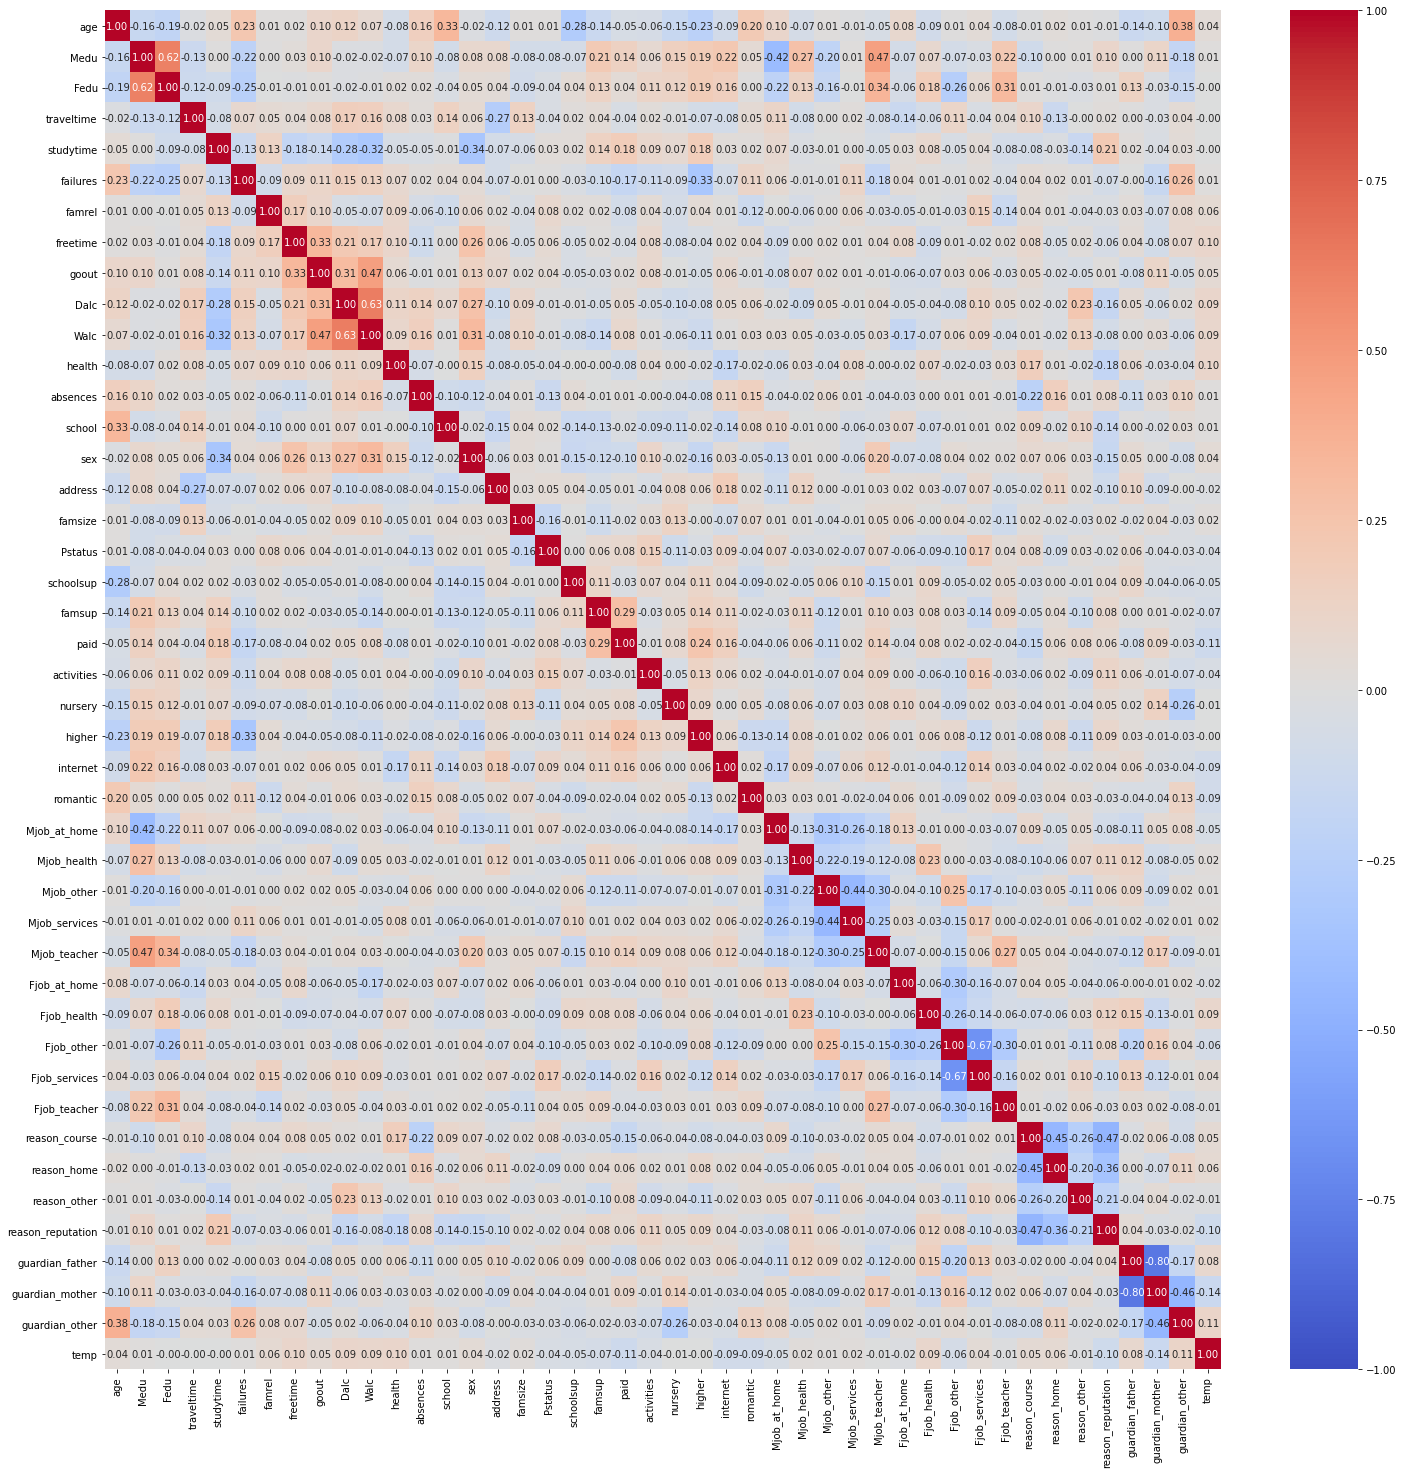

In [17]:
X_train['temp'] = y_train

plt.figure(figsize=(25,25))
sns.heatmap(X_train.corr(),annot = True,fmt = ".2f",cbar = True, vmin=-1, center=0, vmax=1, cmap='coolwarm')

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.1)
sel.fit(X_train)

features = X_train.columns[sel.get_support()]

[x for x in X_train.columns.values if x not in features]

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
en = ElasticNet()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

lr.fit(X_train, y_train)
en.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score

models = ['lr','en','dtr','rfr']

results1 = [r2_score(lr.predict(X_test), y_test),
    r2_score(en.predict(X_test), y_test), r2_score(dtr.predict(X_test), y_test),
    r2_score(rfr.predict(X_test), y_test)]

sns.barplot(x=models, y=results1, color='orange')

print(results1)